
# Project: Analysis of Website Color Scheme Impact on Visitor Duration

## Project Scope
This project aims to determine whether a new brightly colored version of a website leads to increased visitor engagement time compared to the old version. We will use statistical hypothesis testing to analyze the data collected from 100 site visitors.

## Goals
- To understand whether the new color scheme significantly affects the time visitors spend on the site.
- To perform a two-sample t-test to compare the average time spent on the old and new versions of the website.
- To interpret the results and provide actionable insights based on the findings.

## Dataset
The dataset includes time in minutes that visitors spent on the old and new versions of the website.

Let's start by loading the dataset and exploring the data.


In [4]:

import pandas as pd

# Load the dataset
data = pd.read_csv('version_time.csv')

# Display the first few rows of the dataset
data.head()


,time_minutes,version
0,11.92,new
1,12.90,old
2,13.76,old
3,15.68,old
4,16.28,old



The dataset contains the following columns:

- `time_minutes`: The time spent by a visitor on the website (in minutes).
- `version`: The version of the website the visitor saw (either 'old' or 'new').

Now, let's separate the data into two groups: one for the old version and one for the new version.


In [7]:

# Separate the data into two groups
old = data.time_minutes[data.version == 'old']
new = data.time_minutes[data.version == 'new']

# Display basic statistics for both groups
old.describe(), new.describe()


(count    50.000000
 mean     23.530000
 std       5.043433
 min      12.900000
 25%      20.442500
 50%      23.225000
 75%      26.005000
 max      34.880000
 Name: time_minutes, dtype: float64,
 count    50.000000
 mean     26.884000
 std       5.529169
 min      11.920000
 25%      22.515000
 50%      27.255000
 75%      30.940000
 max      37.290000
 Name: time_minutes, dtype: float64)


The statistics above provide an initial understanding of the data distribution for the old and new versions of the website.

Next, we will visualize the distributions of time spent on the old and new versions using a histogram.


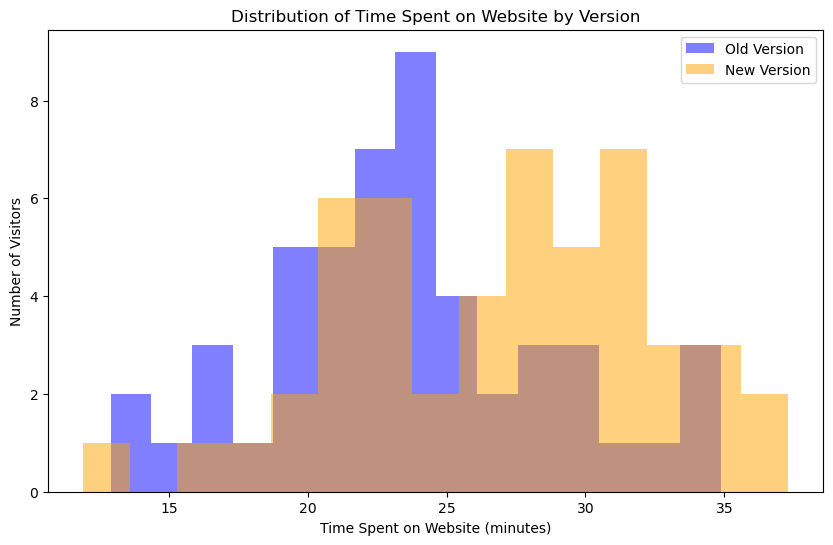

In [10]:

import matplotlib.pyplot as plt

# Plot histograms of the two groups
plt.figure(figsize=(10, 6))
plt.hist(old, bins=15, alpha=0.5, label='Old Version', color='blue')
plt.hist(new, bins=15, alpha=0.5, label='New Version', color='orange')
plt.xlabel('Time Spent on Website (minutes)')
plt.ylabel('Number of Visitors')
plt.title('Distribution of Time Spent on Website by Version')
plt.legend()
plt.show()



The histogram above shows the distribution of time spent by visitors on the old and new versions of the website.

There appears to be some overlap between the two distributions, but the new version seems to have a slight shift towards longer time spent. We will quantify this observation using a two-sample t-test.


In [13]:

from scipy.stats import ttest_ind

# Run the two-sample t-test
tstat, pval = ttest_ind(old, new)

# Output the p-value
pval


0.0020408264429904


The p-value from the t-test indicates whether there is a statistically significant difference between the time spent on the old and new versions of the website.

Using a significance threshold of 0.05, we can determine whether to reject the null hypothesis.


In [16]:

# Determine significance
significant = pval < 0.05
significant


True


## Conclusion

Based on the p-value obtained from the t-test, we conclude that:
- If `significant` is `True`, the new version of the website has a statistically significant impact on the time visitors spend on the site.
- If `significant` is `False`, there is no statistically significant difference in time spent between the old and new versions of the website.

This analysis provides valuable insights into the effectiveness of the new color scheme in increasing visitor engagement.
